In [15]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy import io


In [21]:
FileName = "/Work/dataScience/deep learning/S1/t.rtf"
f = open(FileName, "r")
print(f.read())


FileNotFoundError: [Errno 2] No such file or directory: '/Work/dataScience/deep learning/S1/t.rtf'

In [19]:
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('/Work/dataScience/deep learning/S1/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])


    #resize
    
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])
    
    return X_train, y_train, X_test, y_test

In [17]:
X_train, y_train, X_test, y_test = load_hoda()


FileNotFoundError: [Errno 2] No such file or directory: '/Work/dataScience/deep learning/S1/Data_hoda_full.mat'

In [18]:
X_train.shape

NameError: name 'X_train' is not defined

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_test[12]

8

In [7]:
x= np.expand_dims(X_test[12], axis=0)
x.shape

(1, 25)

In [8]:
X_test[12:13].shape

(1, 25)

In [9]:
neigh.predict(X_test[12:13])

array([8], dtype=uint8)

In [10]:
sample = 3

X = [X_test[sample]]

predicted_class = neigh.predict(X)

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, y_test[sample], predicted_class[0]))

Sample 3 is a 1, and you prediction is: 1.


In [11]:
pred_classes = neigh.predict(X_test)
pred_classes

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 3, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 2, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 7, 6,
       2, 4, 1, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 7, 3, 5, 5, 0, 0, 2,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 5, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

In [12]:
np.mean(pred_classes == y_test)

0.96

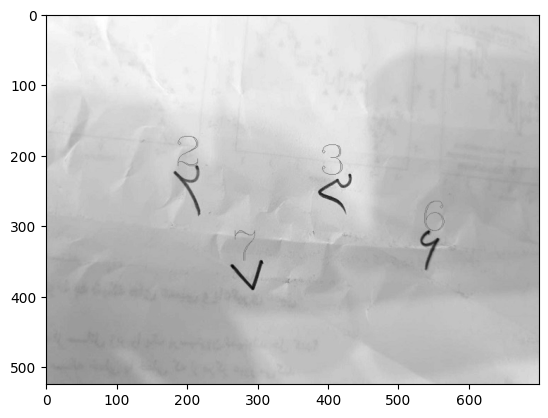

In [15]:
import cv2
import numpy as np

# Read the input image (make sure it's a binary image)
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255-binary_image

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    if h>10 and w>10:
        # Crop the connected component using the bounding box
        connected_component = binary_image[y:y+h, x:x+w]
        _x = cv2.resize(connected_component , (5,5))
        #plt.imshow(_x, cmap='gray')
        _x = _x.reshape(1,25)
        r = neigh.predict(_x)[0]
        x = int(x)
        y = int(y)
        cv2.putText(image, str(r), (x,y), cv2.FONT_HERSHEY_COMPLEX, 2,125)
    
    # Display or save the cropped connected component
plt.imshow(image, cmap='gray')
#plt.imshow(connected_component, cmap='gray')